# 1.0 - Train Word2Vec on a Small Dataset

### The following code example train a model ( Word2Vec) to find a similar word for “country” using the text data set provided about Sri Lanka. 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/e3a7fa58-e14c-4bf0-b9f0-
[nltk_data]     8d5e32d4ae48/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vocabulary:
['sri', 'lanka', 'country', 'diverse', 'heritage', 'world', 'tea', 'cricket', 'known', 'city', 'india', 'capital', 'anuradhapura', 'unesco', 'located', 'nation', 'site', 'rich', 'buddhist', 'yala', 'national', 'park', 'home', 'island', 'range', 'wildlife', 'including', 'ancient', 'plantations', 'region', 'history', 'colombo', 'south', 'vibrant', 'culture', 'ocean', 'colonial', 'famous', 'key', 'indian', 'production', 'hill', 'elephants', 'nuwara', 'eliya', 'leopards', 'society', 'multicultural', 'cuisine', 'fortified', 'dutch', 'historic', 'landmark', 'southern', 'team', 'achieved', 'global', 'recognition', 'winning', 'cup', 'celebrates', 'festivals', 'sinhala', 'tamil', 'new', 'year', 'vesak', 'reflecting', 'later', 'portuguese', 'built', 'popular', 'renowned', 'use', 'spices', 'dishes', 'like', 'rice', 'curry', 'hoppers', 'sinharaja', 'fort', 'forest', 'reserve', 'tropical', 'rainforest', 'endemic', 'flora', 'fauna', 'galle', 'lankan']

Word Vector for 'country':
[ 1.0275

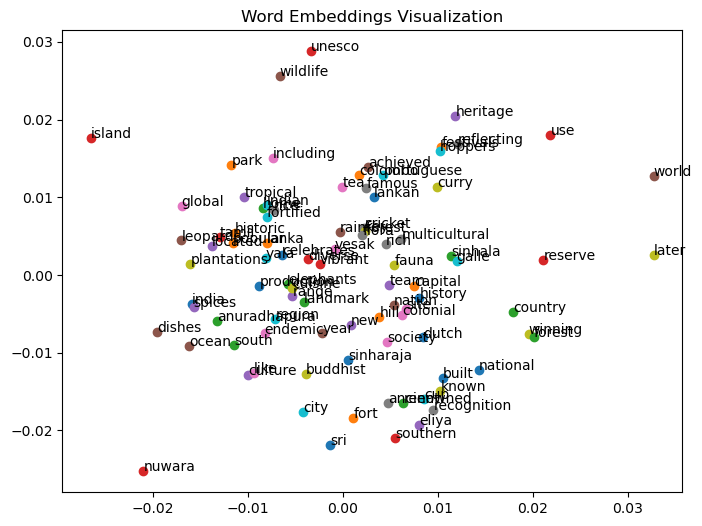

In [3]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

# Ensure required data is downloaded
nltk.download('stopwords')

# Sample small text dataset
dataset = [
    "Sri Lanka is an island nation located in the Indian Ocean, south of India.",
    "The country's capital is Colombo, known for its vibrant culture and colonial history.",
    "Sri Lanka is famous for its tea production, with the hill city of Nuwara Eliya being a key region for tea plantations.",
    "The ancient city of Anuradhapura is a UNESCO World Heritage Site with rich Buddhist heritage.",
    "The Yala National Park in Sri Lanka is home to a diverse range of wildlife, including leopards and elephants.",
    "Sri Lankan cuisine is renowned for its use of spices, with dishes like rice and curry and hoppers being popular.",
    "The Sinharaja Forest Reserve is a tropical rainforest in Sri Lanka, known for its endemic flora and fauna.",
    "Galle Fort, built by the Portuguese and later fortified by the Dutch, is a historic landmark in southern Sri Lanka",
    "Sri Lanka's cricket team has achieved global recognition, winning the Cricket World Cup in 1996.",
    "The country celebrates diverse festivals such as Sinhala and Tamil New Year and Vesak, reflecting its multicultural society."
 
]

# Preprocessing function
def preprocess_text(corpus):
    stop_words = set(stopwords.words('english'))
    preprocessed_corpus = []
    for sentence in corpus:
        # Tokenize and remove stopwords
        tokens = simple_preprocess(sentence, deacc=True)  # deacc=True removes punctuations
        tokens = [word for word in tokens if word not in stop_words]
        preprocessed_corpus.append(tokens)
    return preprocessed_corpus

# Preprocess the dataset
processed_corpus = preprocess_text(dataset)

# Train Word2Vec model
model = Word2Vec(
    sentences=processed_corpus,
    vector_size=100,  # Dimensionality of word vectors
    window=3,         # Context window size
    min_count=1,      # Minimum word frequency to include in vocabulary
    workers=4,        # Number of threads for training
    sg=1              # Skip-gram (1) or CBOW (0)
)

# Save the model
model.save("word2vec_demo.model")

# Display vocabulary
print("Vocabulary:")
print(list(model.wv.index_to_key))

# Test the model
print("\nWord Vector for 'country':")
print(model.wv['country'])  # Access the vector for the word 'country'

print("\nMost Similar Words to 'country':")
print(model.wv.most_similar('country'))

# Visualize word vectors using dimensionality reduction (optional)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract word vectors and labels
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# Reduce dimensionality
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot word vectors
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Word Embeddings Visualization")
plt.show()


In [4]:
from glove import Corpus, Glove
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Sample dataset
dataset = [
    "Natural Language Processing is a fascinating field of Artificial Intelligence.",
    "Word embeddings help capture semantic meaning in text.",
    "Applications of NLP include chatbots, sentiment analysis, and machine translation.",
    "Pre-trained models like Word2Vec and GloVe have revolutionized NLP.",
    "Deep learning techniques are commonly used in modern NLP tasks."
]

# Preprocessing function
def preprocess_text(corpus):
    stop_words = set(stopwords.words('english'))
    preprocessed_corpus = []
    for sentence in corpus:
        # Tokenize and remove stopwords
        tokens = word_tokenize(sentence.lower())
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        preprocessed_corpus.append(tokens)
    return preprocessed_corpus

# Preprocess the dataset
processed_corpus = preprocess_text(dataset)

# Create a co-occurrence matrix
corpus = Corpus()
corpus.fit(processed_corpus, window=5)  # Window size determines the context size

# Train GloVe model
glove = Glove(no_components=100, learning_rate=0.05)  # 100-dimensional embeddings
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

# Save the model
glove.save("glove_demo.model")

# Display vocabulary
print("Vocabulary:")
print(glove.dictionary.keys())

# Test the model
print("\nWord Vector for 'nlp':")
print(glove.word_vectors[glove.dictionary['nlp']])

print("\nMost Similar Words to 'nlp':")
print(glove.most_similar('nlp'))

# Visualize word vectors using dimensionality reduction (optional)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract word vectors and labels
words = list(glove.dictionary.keys())
vectors = [glove.word_vectors[glove.dictionary[word]] for word in words]

# Reduce dimensionality
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot word vectors
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("GloVe Word Embeddings Visualization")
plt.show()


ModuleNotFoundError: No module named 'glove'